*Chavda Haarit Ravindrakumar*
*(23110077)*
# ML Prerequisite Exam

# Q1

To perform matrix multiplication between a matrix of size n×k and a matrix of size k×m, resulting in a matrix of size n×mn×m, we need to carry out specific arithmetic operations. Each element in the resultant matrix is computed by multiplying corresponding elements from the k columns of the first matrix with the k rows of the second matrix, resulting in a total of n×m×k multiplication operations. Subsequently, these products are summed to form each element of the resultant matrix, requiring k−1 additions per element. Therefore, the total number of additions required is n×m×(k−1).

# Q2

Time taken by numpy is less than that of python loops because numpy uses vectorization to carry out simultaneous computations. This makes it faster as compared to python loops. Moreover, python loops are single threaded process and numpy uses multiple threads to perform computation. Numpy uses optimized C libraries and hence it is more  efficient in memory usage and computation.

In [1]:
import numpy as np
import time
def multiply(A,B):
    if (len(A[0])!=len(B)):
        return [[-1]]

    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = []

    for i in range(n):
        temp = []
        for l in range(m):
            sum = 0
            for j in range(k):
                sum += A[i][j]*B[j][l]
            temp.append(sum)
        C.append(temp)
    return C

# A = [[1, 2],
#     [3, 4],
#     [5, 6]]

# B = [[7, 8, 9],
#      [10, 11, 12]]

A = np.random.rand(200,100)
B = np.random.rand(100,200)

a = time.time()
C1 = multiply(A,B)
b = time.time()
C2 = np.matmul(np.array(A),np.array(B))
c = time.time()

print("Using the custom function ...")
print(np.array(C1))
print("Time taken : ",b-a)

print("\n\n")
print("Using numpy ..")
print(C2)
print("Time taken: ",c-b)

Using the custom function ...
[[24.18513397 20.68217169 22.6875579  ... 19.78668333 22.28278344
  22.63626321]
 [28.65858062 22.91077957 25.67419618 ... 24.57768211 24.59458792
  27.43332944]
 [27.3363717  23.4138681  25.7701793  ... 25.88886603 25.40232719
  24.35895892]
 ...
 [26.05380901 22.26634638 25.48892426 ... 23.41671701 24.39070667
  24.8685336 ]
 [26.20711477 21.40470138 23.09435728 ... 23.07381705 21.94572917
  24.06588129]
 [23.87747057 20.24050027 21.86575366 ... 20.31861586 22.01946683
  22.81716164]]
Time taken :  1.8598361015319824



Using numpy ..
[[24.18513397 20.68217169 22.6875579  ... 19.78668333 22.28278344
  22.63626321]
 [28.65858062 22.91077957 25.67419618 ... 24.57768211 24.59458792
  27.43332944]
 [27.3363717  23.4138681  25.7701793  ... 25.88886603 25.40232719
  24.35895892]
 ...
 [26.05380901 22.26634638 25.48892426 ... 23.41671701 24.39070667
  24.8685336 ]
 [26.20711477 21.40470138 23.09435728 ... 23.07381705 21.94572917
  24.06588129]
 [23.87747057 20.

# Q3

Assume the length of array is n and by time complexity I mean average time complexity.

Here I will be using four differnt approaches :

1) ### Repeated Pass

    In this method we will loop over the whole array n/2 times and store the nth maximum value. From this storage we will then use n and n-1th value to calculate the median.
    So in this algo time complexity will be O(n*n/2) = O(n^2)
3) ### Sorting the array

    In this method we will sort the array the then use the n/2 and n/2 -1 indexes to calculate the median.
    Sorting of array has time complexity of O(nlog(n)) and hence the for this algo time complexity will be O(nlog(n))
4) ### Quick Select

    We will find the n/2 and n/2-1  maximum element using quickselect and then use them to calculate the median.
    Quick Select has time complexity of O(n). So for the algo the T.C = O(2n) = O(n)

5) ### numpy.median

    Efficient and can handle multidimensional arrays.

In [2]:
import time
import numpy as np
def median_repeated_pass(arr):
    dict1 = {}
    
    if not arr:
        return None
    
    n = len(arr)
    k = n // 2
    
    for _ in range(k + 1):
        maxval = float('-inf')
        for j in arr:
            if j > maxval and j not in dict1.values():
                maxval = j
        dict1[_] = maxval
        
    if n % 2 == 1:
        return dict1[k]
    else:
        return (dict1[k-1] + dict1[k]) / 2


def median_optimized1(arr):
    l = len(arr) // 2
    arr1 = sorted(arr)  
    
    if len(arr) % 2 == 0:
        return (arr1[l - 1] + arr1[l]) / 2
    else:
        return arr1[l]

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

def partition(arr, left, right):
    pivot = left
    i = left + 1
    j = right

    while True:
        while i <= j and arr[i] <= arr[pivot]:
            i += 1
        while i <= j and arr[j] >= arr[pivot]:
            j -= 1
        if i < j:
            swap(arr, i, j)
        else:
            break
    swap(arr, pivot, j)
    return j
    
def quickselect(arr, low, high, k):

    if low == high:
        return arr[low]
        
    index = partition(arr, low, high)
    
    if k < index:
        return quickselect(arr, low, index - 1, k)
    elif k > index:
        return quickselect(arr, index + 1, high, k)
    else:
        return arr[index]

def median_optimized2(arr):
    n = len(arr)
    mid = n // 2
    
    if n % 2 == 1:
        return quickselect(arr, 0, n - 1, mid)
    else:
        return (quickselect(arr, 0, n - 1, mid - 1) + quickselect(arr, 0, n - 1, mid)) / 2




arr = np.random.rand(2000)
arr = list(arr)
a = time.time()
var1 = median_repeated_pass(arr)
b = time.time()
var2 = median_optimized1(arr)
c = time.time()
var3 = median_optimized2(arr)
d = time.time()
var4 = np.median(arr)
e = time.time()

print("Median using repeated pass:\t\t",var1,"\ttime taken",b-a)
print("Median using optimized approach 1:\t",var2,"\ttime taken",c-b)
print("Median using optimized approach 2:\t",var3,"\ttime taken",d-c)
print("Median using numpy:\t\t\t",var4,"\ttime taken",e-d)

Median using repeated pass:		 0.5017958880592466 	time taken 5.967045783996582
Median using optimized approach 1:	 0.5017958880592466 	time taken 0.008133888244628906
Median using optimized approach 2:	 0.5017958880592466 	time taken 0.006598711013793945
Median using numpy:			 0.5017958880592466 	time taken 0.0


# Q4

The gradient of the function with respect to x and y is : 



$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$


$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$


$$
\nabla f = \left( 2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right)
$$


# Q5

In [3]:
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def df_dx(x,y):
    return ((2*x*y)+(y**3 * jnp.cos(x)))

def df_dy(x,y):
    return x**2 + 3 * (y**2) * jnp.sin(x)


grad_f = jax.grad(f, argnums=(0, 1))

for _ in range(10):
    x_val = np.random.rand()
    y_val = np.random.rand()
    
    custom_grad_x = df_dx(x_val, y_val)
    custom_grad_y = df_dy(x_val, y_val)
    
    grad = grad_f(x_val, y_val)
    
    print("Gradient using custom function: (", custom_grad_x, ",", custom_grad_y, ")")
    
    print("Gradient using JAX:            ", end="")
    print('(',end='')
    for i in grad:
        print(i, end="  ")
    print(')',end='')
    print('\n')



Gradient using custom function: ( 0.21129264 , 0.5246914 )
Gradient using JAX:            (0.21129262  0.52469134  )

Gradient using custom function: ( 0.3201883 , 0.22662094 )
Gradient using JAX:            (0.3201883  0.22662094  )

Gradient using custom function: ( 1.4018958 , 1.4062808 )
Gradient using JAX:            (1.4018958  1.4062806  )

Gradient using custom function: ( 0.1005943 , 0.12521899 )
Gradient using JAX:            (0.10059429  0.12521897  )

Gradient using custom function: ( 0.1161901 , 0.10754609 )
Gradient using JAX:            (0.116190106  0.10754609  )

Gradient using custom function: ( 0.4831532 , 0.039118 )
Gradient using JAX:            (0.48315322  0.039118  )

Gradient using custom function: ( 2.4430315 , 3.2379394 )
Gradient using JAX:            (2.4430315  3.2379391  )

Gradient using custom function: ( 0.4076559 , 0.40688777 )
Gradient using JAX:            (0.4076559  0.40688777  )

Gradient using custom function: ( 1.6100559 , 1.6301875 )
Gradient 

# Q6

In [4]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)


print("Function:")
display(f)

print("\nGradient with respect to x:")
display(df_dx)
# sp.pprint(df_dx)

print()

print("\nGradient with respect to y:")
# sp.pprint(df_dy)
display(df_dy)


Function:


x**2*y + y**3*sin(x)


Gradient with respect to x:


2*x*y + y**3*cos(x)



Gradient with respect to y:


x**2 + 3*y**2*sin(x)

# Q7

In [5]:
data = {
    2022: {
        'Computer Science': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 100, 'DSA': 70}},
            2: {'Name': 'Mohan', 'Marks': {'Maths': 85, 'DSA': 90}},
        },
        'Electrical': {
            3: {'Name': 'Soham', 'Marks': {'Maths': 78, 'Electronic Devices': 82}},
        }
    },
    2023: {
        'Computer Science': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 100, 'DSA': 70}},
            2: {'Name': 'Mohan', 'Marks': {'Maths': 85, 'DSA': 90}},
        },
        'Electrical': {
            3: {'Name': 'Soham', 'Marks': {'Maths': 78, 'Electronic Devices': 82}},
        }
    },
    2024: {
        'Computer Science': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 100, 'DSA': 70}},
            2: {'Name': 'Mohan', 'Marks': {'Maths': 85, 'DSA': 90}},
        },
        'Electrical': {
            3: {'Name': 'Soham', 'Marks': {'Maths': 78, 'Electronic Devices': 82}},
        }
    },
    2025: {
        'Computer Science': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 100, 'DSA': 70}},
            2: {'Name': 'Mohan', 'Marks': {'Maths': 85, 'DSA': 90}},
        },
        'Electrical': {
            3: {'Name': 'Soham', 'Marks': {'Maths': 78, 'Electronic Devices': 82}},
        }
    }
}


for year, branches in data.items():
    print(f"Year: {year}")
    for branch, students in branches.items():
        print(f"  {branch}:")
        for roll_number, student_info in students.items():
            name = student_info['Name']
            marks = student_info['Marks']
            print(f"    Roll Number: {roll_number}, Name: {name}")
            print("    Marks:")
            for subject, mark in marks.items():
                print(f"      {subject}: {mark}")
            print() 
    print()  



Year: 2022
  Computer Science:
    Roll Number: 1, Name: Rahul
    Marks:
      Maths: 100
      DSA: 70

    Roll Number: 2, Name: Mohan
    Marks:
      Maths: 85
      DSA: 90

  Electrical:
    Roll Number: 3, Name: Soham
    Marks:
      Maths: 78
      Electronic Devices: 82


Year: 2023
  Computer Science:
    Roll Number: 1, Name: Rahul
    Marks:
      Maths: 100
      DSA: 70

    Roll Number: 2, Name: Mohan
    Marks:
      Maths: 85
      DSA: 90

  Electrical:
    Roll Number: 3, Name: Soham
    Marks:
      Maths: 78
      Electronic Devices: 82


Year: 2024
  Computer Science:
    Roll Number: 1, Name: Rahul
    Marks:
      Maths: 100
      DSA: 70

    Roll Number: 2, Name: Mohan
    Marks:
      Maths: 85
      DSA: 90

  Electrical:
    Roll Number: 3, Name: Soham
    Marks:
      Maths: 78
      Electronic Devices: 82


Year: 2025
  Computer Science:
    Roll Number: 1, Name: Rahul
    Marks:
      Maths: 100
      DSA: 70

    Roll Number: 2, Name: Mohan
    Marks:

# Q8

In [6]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __str__(self):
        marks_str = ", ".join(f"{subject}: {mark}" for subject, mark in self.marks.items())
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: [{marks_str}]"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        students_str = "\n    ".join(str(student) for student in self.students)
        return f"Branch: {self.name}\n    {students_str}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        branches_str = "\n  ".join(str(branch) for branch in self.branches)
        return f"Year: {self.year}\n  {branches_str}"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __str__(self):
        years_str = "\n".join(str(year) for year in self.years)
        return f"Database:\n{years_str}"


db = Database()

year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "Rahul", {"Maths": 100, "English": 70}))
branch_1_2022.add_student(Student(2, "Mohan", {"Maths": 85, "English": 90}))
year_2022.add_branch(branch_1_2022)

branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(3, "Soham", {"Maths": 78, "English": 82}))
year_2022.add_branch(branch_2_2022)

db.add_year(year_2022)

print(db)


Database:
Year: 2022
  Branch: Branch 1
    Roll Number: 1, Name: Rahul, Marks: [Maths: 100, English: 70]
    Roll Number: 2, Name: Mohan, Marks: [Maths: 85, English: 90]
  Branch: Branch 2
    Roll Number: 3, Name: Soham, Marks: [Maths: 78, English: 82]


# Q9

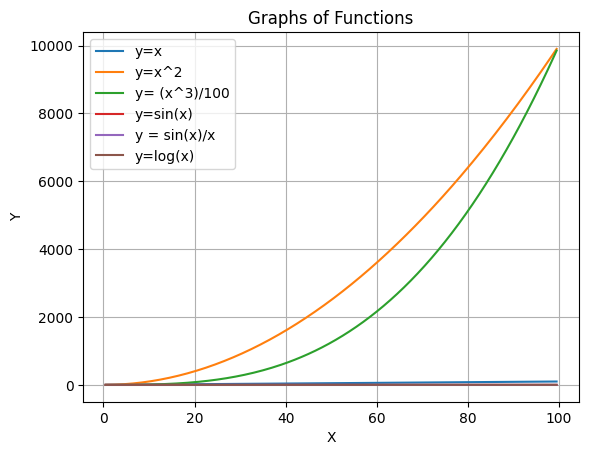

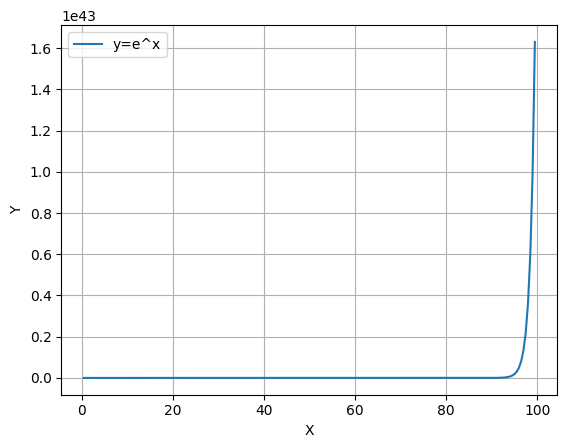

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5,100,0.5)

fig = plt.figure()
plt.grid()
plt.plot(x,x,label = "y=x")
plt.plot(x,x**2,label = "y=x^2")
plt.plot(x,(x**3)/100,label = "y= (x^3)/100")
plt.plot(x,np.sin(x),label = "y=sin(x)")
plt.plot(x,np.sin(x)/x,label = "y = sin(x)/x")
plt.plot(x,np.log10(x),label = "y=log(x)")

plt.title("Graphs of Functions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

plt.plot(x,np.exp(x),label = "y=e^x")
plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Q10

In [8]:
import numpy as np
import pandas as pd

mat = np.random.uniform(1,2,(20,5))

mat_df = pd.DataFrame(mat,columns=["a","b","c","d","e"])

std_columns_value = mat_df.std().max()
std_columns_index = mat_df.std().idxmax()
print("The Column with maximum standard deviation is :", std_columns_index,"  and the max deviations is: ",std_columns_value)

mean_row_value = mat_df.mean(axis=1).min()
mean_row_index = mat_df.mean(axis=1).idxmin()
print("The row with minimum mean is: ",mean_row_index," and the min mean value is: ", mean_row_index)

The Column with maximum standard deviation is : c   and the max deviations is:  0.3145722594665774
The row with minimum mean is:  10  and the min mean value is:  10


# Q11

In [9]:
mat_df['f'] = mat_df.sum(axis=1)
mat_df['g'] = np.where(mat_df['f'] >= 8, 'GT8', 'LT8')

mat_df_lt = mat_df[mat_df['g'] == 'LT8']
mat_df_gt = mat_df[mat_df['g'] == 'GT8']

print("Number of rows with value of 'g' as GT8 are: ",mat_df_gt.shape[0])
print("Number of rows with value of 'g' as LT8 are: ",mat_df_lt.shape[0])

std_lt = mat_df_lt['f'].std()
std_gt = mat_df_gt['f'].std()

print('The standard deviation for LT8:',std_lt)
print('The standard deviation for GT8:',std_gt)

Number of rows with value of 'g' as GT8 are:  5
Number of rows with value of 'g' as LT8 are:  15
The standard deviation for LT8: 0.5370744209179426
The standard deviation for GT8: 0.09776826462489387


# Q12

Broadcasting is process of transforming the smaller correspoinding to the dimensions of the larger array. This is done to vectorize the operations so that python loops can be avoided and computation is done efficiently. 

Simplest example:  
consider we add \[1 2 3] and \[2] then the resultant will be \[3,4,5]. This is because \[2] is stretched to \[2,2,2] and then added to the prior array.

Two arrays are broadcastable if and only if the trailing dimensions of the arrays are equal or last dimension of one of the array is 1.

In [10]:
import numpy as np

mat1 = np.array([[1, 2, 3], [4, 5, 6]])
mat2 = np.array([10, 20, 30])

result = mat1 + mat2

print("Matrix 1:")
print(mat1)
print("Matrix 2:")
print(mat2)

print("\nMatrix 2 after broadcast\n",np.array([[10,20,30],[10,20,30]]))
print("\nResult of broadcasting:")
print(result)


Matrix 1:
[[1 2 3]
 [4 5 6]]
Matrix 2:
[10 20 30]

Matrix 2 after broadcast
 [[10 20 30]
 [10 20 30]]

Result of broadcasting:
[[11 22 33]
 [14 25 36]]


# Q13

In [11]:

def argmin(arr):
    minindex = 0
    minvalue = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < minvalue:
            minvalue = arr[i]
            minindex = i
    
    return minindex

arr = np.array([13,7,10,13,9,4,23])

print("Argmin using custom fucntion: ",argmin(arr))
print("Argmin using numpy function : ",np.argmin(arr))

Argmin using custom fucntion:  5
Argmin using numpy function :  5
